# Pré Traitement

In [1]:
#Import des bibiothèques 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importation du dataset

data = pd.read_excel(r'default of credit card clients.xls', index_col=0, header=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Copie du dataset
df = data.copy()

## TrainTest - Nettoyage - Encodage

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Création des trainset et testset
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [6]:
trainset['default payment next month'].value_counts()

0    18661
1     5339
Name: default payment next month, dtype: int64

In [7]:
#On ne touche pas à ce testset
testset['default payment next month'].value_counts()

0    4703
1    1297
Name: default payment next month, dtype: int64

In [8]:
def preprocessing(df):
    
    X = df.drop('default payment next month', axis=1)
    y = df['default payment next month']
    
    print(y.value_counts())
    return X,y

In [9]:
X_train, y_train = preprocessing(trainset)

0    18661
1     5339
Name: default payment next month, dtype: int64


In [10]:
X_test, y_test = preprocessing(testset)

0    4703
1    1297
Name: default payment next month, dtype: int64


## Modelisation

In [11]:
#On utilise l'arbre de décision car il est très rapide et facile à interpréter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [12]:
model = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=20),
                      RandomForestClassifier(random_state=0))

## Evaluation

In [13]:
#Nous allons utiliser les différents outils pour faire de l'évaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [14]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='trains score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[4414  289]
 [ 801  496]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4703
           1       0.63      0.38      0.48      1297

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0]

/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0]

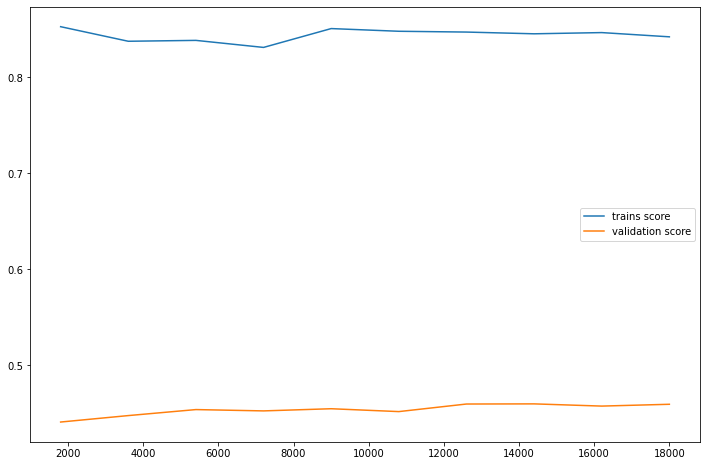

In [15]:
evaluation(model)

## Interprétation de notre modèle

Le modèle ci dessus, nous indique que sur 4703 cas 'Pas de default de carte de crédit' alors on identifie 3869 cas juste donc de '0' et on a rejeté incorrectement 834 cas
Mais le plus important est le cas où 'default payment next month' = 1. On a detecté 557 cas de '1' donc correct et on a rejeté '740' alors que ce sont des defaults de payments
Nous avons 84% de précision pour le cas 0 de réponses juste et 43% sur le cas 1
Notre modèle est en <strong>Overfitting</strong> car il a bien aprris son trainset avec un score de 100% mais a du mal pour généraliser, il ne peut pas appliquer son entrainement sur des données qu'il n'a pas vu. On obtient donc une courbe f1

In [16]:
#Trouver les variables les plus importantes
model.feature_importances_

array([0.06049894, 0.01213996, 0.02403858, 0.01634739, 0.06866225,
       0.15637209, 0.03679949, 0.00882779, 0.01081098, 0.01055624,
       0.01103514, 0.06609774, 0.03867919, 0.04006487, 0.04150849,
       0.04482163, 0.04833772, 0.04952816, 0.05498739, 0.05427714,
       0.04566172, 0.04479356, 0.05515355])

In [17]:
pd.DataFrame(model.feature_importances_,index=X_train.columns)

,0
LIMIT_BAL,0.060499
SEX,0.012140
EDUCATION,0.024039
MARRIAGE,0.016347
AGE,0.068662
PAY_0,0.156372
PAY_2,0.036799
PAY_3,0.008828
PAY_4,0.010811
PAY_5,0.010556


<AxesSubplot:>

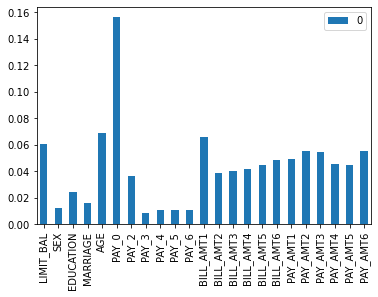

In [18]:
#Visualisation
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar()